In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from config import DATA_DIR

In [2]:
rollout_fname = 'rollout0.npz'

In [3]:
latent_data = np.load(os.path.join(DATA_DIR['latent'], 'latent_' + rollout_fname))
x_true = latent_data['x_true']
z_infer = latent_data['z_infer']

In [4]:
def average(vel, interval=10):
    assert len(vel) % interval == 0
    vel_avg = np.tile(
        vel.reshape(-1,10).mean(1, keepdims=True), reps=(1, 10)
    ).flatten()
    return vel_avg

ang_vel = x_true[:,9]  # angular velocity
ang_vel = average(ang_vel)

<IPython.core.display.Javascript object>


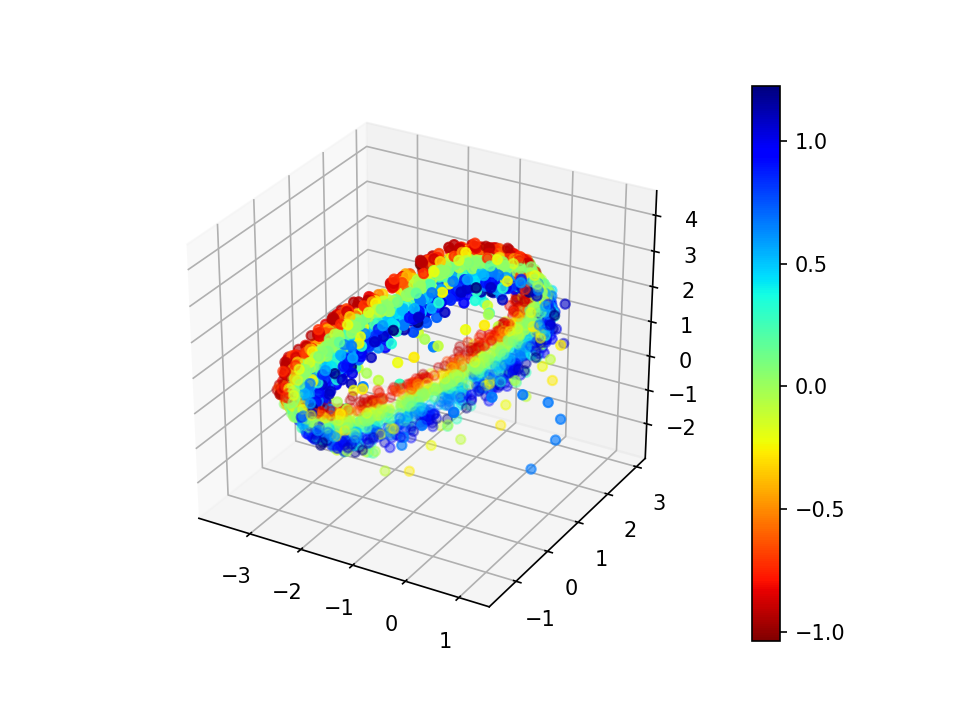

In [5]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.grid()
p = ax.scatter(z_infer[:, 0], z_infer[:, 1], z_infer[:,2], c = ang_vel, cmap='jet_r')
fig.colorbar(p)
plt.show()